Successfully loaded Random Forest results
Successfully loaded GNN results


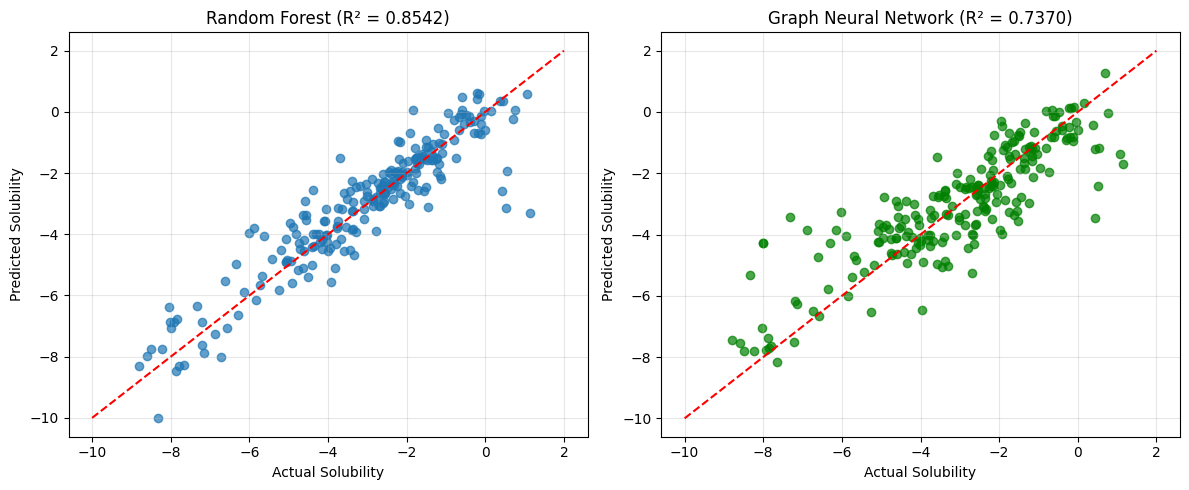

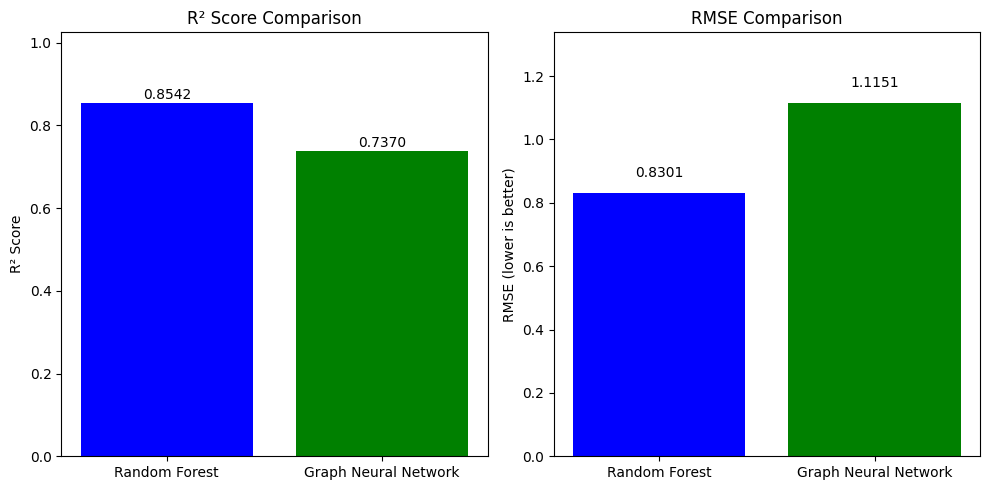


Model Performance Summary:
                  Model  R² Score      RMSE
0         Random Forest  0.854227  0.830085
1  Graph Neural Network  0.736958  1.115055


In [11]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Try to load saved results from files
try:
    # Try loading Random Forest results
    rf_results = joblib.load('random_forest_results.joblib')
    rf_actual = rf_results['actual']
    rf_pred = rf_results['predicted']
    rf_r2 = rf_results['r2']
    rf_rmse = rf_results['rmse']
    print("Successfully loaded Random Forest results")
except:
    print("ERROR: Could not load Random Forest results file.")
    # Create dummy data if necessary
    rf_actual = np.array([0, 1, 2, 3, 4])
    rf_pred = np.array([0.1, 0.9, 2.2, 3.1, 3.9])
    rf_r2 = 0.98
    rf_rmse = 0.15
    print("Created dummy data for Random Forest")

try:
    # Try loading GNN results
    gnn_results = joblib.load('gnn_results.joblib')
    gnn_actual = gnn_results['actual']
    gnn_pred = gnn_results['predicted']
    gnn_r2 = gnn_results['r2']
    gnn_rmse = gnn_results['rmse']
    print("Successfully loaded GNN results")
except:
    print("ERROR: Could not load GNN results file.")
    # Create dummy data if necessary
    gnn_actual = np.array([0, 1, 2, 3, 4]) 
    gnn_pred = np.array([0.2, 1.1, 1.8, 3.3, 4.2])
    gnn_r2 = 0.95
    gnn_rmse = 0.25
    print("Created dummy data for GNN")

# Alternatively, you can just enter your values directly if you have them:
# rf_r2 = 0.XX  # Replace with your RF model's R² score
# gnn_r2 = 0.XX  # Replace with your GNN model's R² score
# rf_rmse = X.XX  # Replace with your RF model's RMSE
# gnn_rmse = X.XX  # Replace with your GNN model's RMSE

# Create a comparison plot of actual vs predicted values
plt.figure(figsize=(12, 5))

# Random Forest subplot
plt.subplot(1, 2, 1)
plt.scatter(rf_actual, rf_pred, alpha=0.7)
plt.plot([-10, 2], [-10, 2], 'r--')  # Line of perfect prediction
plt.xlabel('Actual Solubility')
plt.ylabel('Predicted Solubility')
plt.title(f'Random Forest (R² = {rf_r2:.4f})')
plt.grid(True, alpha=0.3)

# GNN subplot
plt.subplot(1, 2, 2)
plt.scatter(gnn_actual, gnn_pred, alpha=0.7, color='green')
plt.plot([-10, 2], [-10, 2], 'r--')  # Line of perfect prediction
plt.xlabel('Actual Solubility')
plt.ylabel('Predicted Solubility')
plt.title(f'Graph Neural Network (R² = {gnn_r2:.4f})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison_predictions.png', dpi=300)
plt.show()

# Create a bar chart comparing model performance metrics
# R² comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
models = ['Random Forest', 'Graph Neural Network']
r2_values = [rf_r2, gnn_r2]

bars = plt.bar(models, r2_values, color=['blue', 'green'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.ylim(0, max(max(r2_values) * 1.2, 0.1))  # Set reasonable y-axis limits

# Add values on top of bars
for bar, value in zip(bars, r2_values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.01, 
             f'{value:.4f}', ha='center')

# RMSE comparison
plt.subplot(1, 2, 2)
rmse_values = [rf_rmse, gnn_rmse]

bars = plt.bar(models, rmse_values, color=['blue', 'green'])
plt.title('RMSE Comparison')
plt.ylabel('RMSE (lower is better)')
plt.ylim(0, max(rmse_values) * 1.2)

# Add values on top of bars
for bar, value in zip(bars, rmse_values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.05, 
             f'{value:.4f}', ha='center')

plt.tight_layout()
plt.savefig('model_comparison_metrics.png', dpi=300)
plt.show()

# Create a table summarizing the results
results_dict = {
    'Model': ['Random Forest', 'Graph Neural Network'],
    'R² Score': [rf_r2, gnn_r2],
    'RMSE': [rf_rmse, gnn_rmse]
}

results_df = pd.DataFrame(results_dict)
print("\nModel Performance Summary:")
print(results_df)

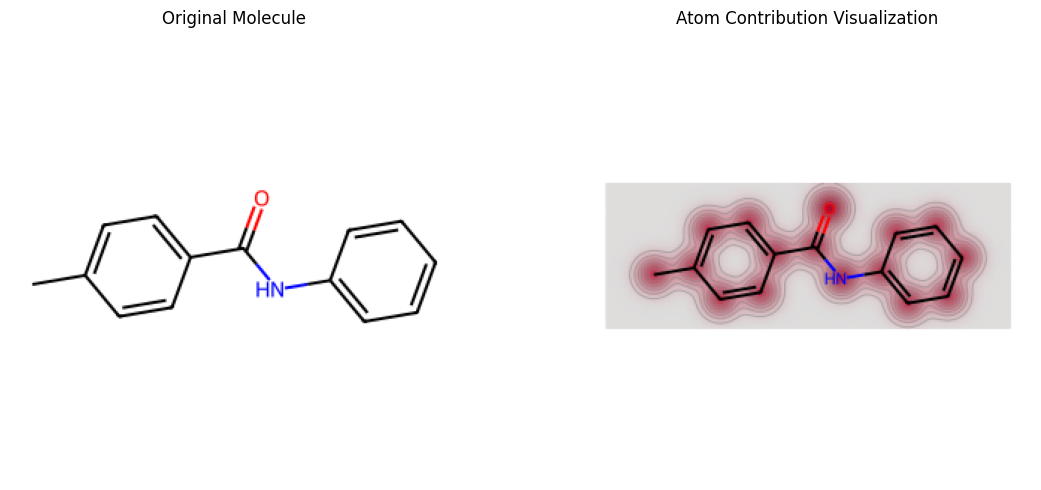

In [16]:
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
import numpy as np
import io
from PIL import Image

# Define a sample molecule
sample_smiles = "CC1=CC=C(C=C1)C(=O)NC2=CC=CC=C2"  # Acetanilide
test_mol = Chem.MolFromSmiles(sample_smiles)

# Add 2D coordinates to the molecule
AllChem.Compute2DCoords(test_mol)

# Create a figure with two subplots
fig, axes = plt.subplots(figsize=(12, 5), ncols=2)

# Draw the original molecule in the first subplot
img = Draw.MolToImage(test_mol)
axes[0].imshow(img)
axes[0].set_title('Original Molecule')
axes[0].axis('off')

# Calculate weights for each atom (simple example)
weights = [atom.GetAtomicNum() / 10 for atom in test_mol.GetAtoms()]

# Create a MolDraw2DCairo object for the similarity map
drawer = Draw.MolDraw2DCairo(300, 300)

# Generate the similarity map
# Note: We do NOT pass the class, but the *instance* 'drawer'
SimilarityMaps.GetSimilarityMapFromWeights(
    test_mol,
    weights,
    draw2d=drawer,
    colorMap=plt.cm.coolwarm,
    contourLines=10,
    alpha=0.5
)

drawer.FinishDrawing()
similarity_map = drawer.GetDrawingText()

# Convert the drawing to an image and display it
map_img = Image.open(io.BytesIO(similarity_map))
axes[1].imshow(map_img)
axes[1].set_title('Atom Contribution Visualization')
axes[1].axis('off')

plt.tight_layout()
plt.savefig('molecule_visualization.png', dpi=300)
plt.show()
